In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

In [2]:
# let's load again the titanic dataset

ds = pd.read_csv('train.csv', usecols=['Ticket', 'Cabin', 'Survived'])

In [3]:
# print the head
ds.head()

,Survived,Ticket,Cabin
0,0,A/5 21171,NaN
1,1,PC 17599,C85
2,1,STON/O2. 3101282,NaN
3,1,113803,C123
4,0,373450,NaN


In [4]:
# let's inspect the mixed variable

ds['Cabin'].unique()

array([nan, 'C85', 'C123', 'E46', 'G6', 'C103', 'D56', 'A6',
       'C23 C25 C27', 'B78', 'D33', 'B30', 'C52', 'B28', 'C83', 'F33',
       'F G73', 'E31', 'A5', 'D10 D12', 'D26', 'C110', 'B58 B60', 'E101',
       'F E69', 'D47', 'B86', 'F2', 'C2', 'E33', 'B19', 'A7', 'C49', 'F4',
       'A32', 'B4', 'B80', 'A31', 'D36', 'D15', 'C93', 'C78', 'D35',
       'C87', 'B77', 'E67', 'B94', 'C125', 'C99', 'C118', 'D7', 'A19',
       'B49', 'D', 'C22 C26', 'C106', 'C65', 'E36', 'C54',
       'B57 B59 B63 B66', 'C7', 'E34', 'C32', 'B18', 'C124', 'C91', 'E40',
       'T', 'C128', 'D37', 'B35', 'E50', 'C82', 'B96 B98', 'E10', 'E44',
       'A34', 'C104', 'C111', 'C92', 'E38', 'D21', 'E12', 'E63', 'A14',
       'B37', 'C30', 'D20', 'B79', 'E25', 'D46', 'B73', 'C95', 'B38',
       'B39', 'B22', 'C86', 'C70', 'A16', 'C101', 'C68', 'A10', 'E68',
       'B41', 'A20', 'D19', 'D50', 'D9', 'A23', 'B50', 'A26', 'D48',
       'E58', 'C126', 'B71', 'B51 B53 B55', 'D49', 'B5', 'B20', 'F G63',
       'C62 C64',

In [5]:
ds['Ticket'].unique()

array(['A/5 21171', 'PC 17599', 'STON/O2. 3101282', '113803', '373450',
       '330877', '17463', '349909', '347742', '237736', 'PP 9549',
       '113783', 'A/5. 2151', '347082', '350406', '248706', '382652',
       '244373', '345763', '2649', '239865', '248698', '330923', '113788',
       '347077', '2631', '19950', '330959', '349216', 'PC 17601',
       'PC 17569', '335677', 'C.A. 24579', 'PC 17604', '113789', '2677',
       'A./5. 2152', '345764', '2651', '7546', '11668', '349253',
       'SC/Paris 2123', '330958', 'S.C./A.4. 23567', '370371', '14311',
       '2662', '349237', '3101295', 'A/4. 39886', 'PC 17572', '2926',
       '113509', '19947', 'C.A. 31026', '2697', 'C.A. 34651', 'CA 2144',
       '2669', '113572', '36973', '347088', 'PC 17605', '2661',
       'C.A. 29395', 'S.P. 3464', '3101281', '315151', 'C.A. 33111',
       'S.O.C. 14879', '2680', '1601', '348123', '349208', '374746',
       '248738', '364516', '345767', '345779', '330932', '113059',
       'SO/C 14885', '31012

Both cabin and ticket contain a numerical part and a categorical part in their values.



In [6]:
# let's extract the numerical and categorical part for cabin

ds['cabin_num'] = ds['Cabin'].str.extract('(\d+)') # captures numerical part
ds['cabin_cat'] = ds['Cabin'].str[0] # captures the first letter

ds[['Cabin', 'cabin_num', 'cabin_cat']].head()

,Cabin,cabin_num,cabin_cat
0,NaN,NaN,NaN
1,C85,85,C
2,NaN,NaN,NaN
3,C123,123,C
4,NaN,NaN,NaN


In [7]:
# let's extract the numerical and categorical part for ticket
# the variable ticket is extremely dirty, so there is only so much that we
# can do, but here are some ideas:

# extract the last bit of ticket as number
ds['ticket_num'] = ds['Ticket'].apply(lambda s: s.split()[-1])
ds['ticket_num'] = pd.to_numeric(ds['ticket_num'],
                                   errors='coerce',
                                   downcast='integer')

# extract the first part of ticket as category
ds['ticket_cat'] = ds['Ticket'].apply(lambda s: s.split()[0])
ds['ticket_cat'] = np.where(ds['ticket_cat'].str.isdigit(), np.nan,
                              ds['ticket_cat'])

ds[['Ticket', 'ticket_num', 'ticket_cat']].head(20)

,Ticket,ticket_num,ticket_cat
0,A/5 21171,21171.0,A/5
1,PC 17599,17599.0,PC
2,STON/O2. 3101282,3101282.0,STON/O2.
3,113803,113803.0,NaN
4,373450,373450.0,NaN
5,330877,330877.0,NaN
6,17463,17463.0,NaN
7,349909,349909.0,NaN
8,347742,347742.0,NaN
9,237736,237736.0,NaN


In [9]:
ds['ticket_cat'].unique()

array(['A/5', 'PC', 'STON/O2.', nan, 'PP', 'A/5.', 'C.A.', 'A./5.',
       'SC/Paris', 'S.C./A.4.', 'A/4.', 'CA', 'S.P.', 'S.O.C.', 'SO/C',
       'W./C.', 'SOTON/OQ', 'W.E.P.', 'STON/O', 'A4.', 'C', 'SOTON/O.Q.',
       'SC/PARIS', 'S.O.P.', 'A.5.', 'Fa', 'CA.', 'LINE', 'F.C.C.', 'W/C',
       'SW/PP', 'SCO/W', 'P/PP', 'SC', 'SC/AH', 'A/S', 'A/4', 'WE/P',
       'S.W./PP', 'S.O./P.P.', 'F.C.', 'SOTON/O2', 'S.C./PARIS',
       'C.A./SOTON'], dtype=object)

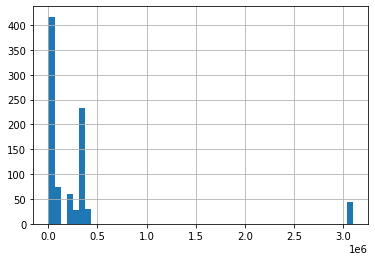

In [11]:
ds['ticket_num'].hist(bins=50)